In [2]:
import pandas as pd

df_prc = pd.read_pickle("C:/Users/hp/Downloads/TER_M1_2025/data/ENQUETE_PRC_BC")
print(" Données PRC ")
print("Nombre de lignes :", len(df_prc))
print("Colonnes :", df_prc.columns.tolist())
print(df_prc.head(), "\n")

df_soins = pd.read_excel("C:/Users/hp/Downloads/TER_M1_2025/data/df_all_care_T0_no_filtered.xlsx")
print(" Données de Soins ")
print("Nombre de lignes :", len(df_soins))
print("Colonnes :", df_soins.columns.tolist())
print(df_soins.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hp/Downloads/TER_M1_2025/data/ENQUETE_PRC_BC'

In [4]:
df_soins.to_csv("df_soins.csv", index=False)


In [3]:
df_soins = pd.read_csv("df_soins.csv")
df_soins.columns


FileNotFoundError: [Errno 2] No such file or directory: 'df_soins.csv'

In [ ]:
def recoder_prc(classe):
    if classe in [1, 2]:
        return 0  
    elif classe == 3:
        return 1  
    else:
        return None  

df_prc['PRC'] = df_prc['peur_recidive1'].apply(recoder_prc)

In [11]:
df_prc.head(20)

,ID_PATIENT,peur_recidive1,PRC
0,1101100325,2,0
1,1101100717,3,1
2,1101100766,1,0
3,1102100494,2,0
4,1102101103,3,1
5,1102101659,2,0
6,1102102186,3,1
7,1103100275,1,0
8,1103101510,1,0
9,1103102437,2,0


In [14]:
df_prc = df_prc[['ID_PATIENT', 'PRC']]


In [15]:
df_prc.head(5 )

,ID_PATIENT,PRC
0,1101100325,0
1,1101100717,1
2,1101100766,0
3,1102100494,0
4,1102101103,1


In [16]:
df_merged = df_soins.merge(df_prc, on='ID_PATIENT', how='inner')

In [24]:
df_merged.head(900)

,ID_PATIENT,CODE,DAYS_SINCE_DIAG,TABLE_ORIGIN,Cons_Med_Gen,Cons_Spe,Mammographie,Echo_Mammaire,Irm_Mammaire,Echo_Abdominal,...,Tamoxifen,Anti_arom,GnrH_ago,CT,Mastectomie,Mastectomie_part,SURG,T0,TREATMENT_TYPE,PRC
0,3104503184,D01AC12,0,medic,0,1,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
1,3104503184,G01AF12,0,medic,0,1,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
2,3104503184,N07BA01,4,medic,1,0,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
3,3104503184,C509,13,pmsi,0,0,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
4,3104503184,FCFA021,13,psmi_act,0,0,0,0,0,0,...,0,0,0,0,0,0,1,161,"CT, HT, RT, SURG",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4105904747,9105,1351,bio,1,0,0,0,0,0,...,0,0,0,0,0,0,0,102,"SURG, RT, HT",0
896,4105904747,QEQM001,1353,ccam,0,0,0,1,0,0,...,0,0,0,0,0,0,0,102,"SURG, RT, HT",0
897,4105904747,QEQK001,1353,ccam,0,0,1,0,0,0,...,0,0,0,0,0,0,0,102,"SURG, RT, HT",0
898,4105904747,L02BG03,1360,medic,0,1,0,0,0,0,...,0,1,0,0,0,0,0,102,"SURG, RT, HT",0


In [25]:
print("Nombre de patientes uniques :", df_merged['ID_PATIENT'].nunique())


Nombre de patientes uniques : 920


In [26]:
df_post_T0 = df_merged[df_merged["DAYS_SINCE_DIAG"] >= df_merged["T0"]]

In [27]:
df_post_T0

,ID_PATIENT,CODE,DAYS_SINCE_DIAG,TABLE_ORIGIN,Cons_Med_Gen,Cons_Spe,Mammographie,Echo_Mammaire,Irm_Mammaire,Echo_Abdominal,...,Tamoxifen,Anti_arom,GnrH_ago,CT,Mastectomie,Mastectomie_part,SURG,T0,TREATMENT_TYPE,PRC
235,3104503184,9005,168,bio,1,0,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
236,3104503184,9105,168,bio,1,0,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
237,3104503184,7321,168,bio,1,0,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
238,3104503184,2258,168,bio,1,0,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
239,3104503184,0514,168,bio,1,0,0,0,0,0,...,0,0,0,0,0,0,0,161,"CT, HT, RT, SURG",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485282,4308300843,L02BG03,888,medic,0,1,0,0,0,0,...,0,1,0,0,0,0,0,804,HT,0
485283,3107502798,L02BG03,1060,medic,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1060,HT,1
485284,3107502798,V08AB10,1106,medic,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1060,HT,1
485285,3107502798,V08BA02,1106,medic,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1060,HT,1


In [32]:
df_post_T0["mois_depuis_T0"] = ((df_post_T0["DAYS_SINCE_DIAG"] - df_post_T0["T0"]) / 30).astype(int)


C:\Users\hp\AppData\Local\Temp\ipykernel_28384\1400350702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_T0["mois_depuis_T0"] = ((df_post_T0["DAYS_SINCE_DIAG"] - df_post_T0["T0"]) / 30).astype(int)


In [28]:
actes_suivi = [
    "Mammographie", "Echo_Mammaire", "Irm_Mammaire",
    "Cons_Med_Gen", "Cons_Spe",
    "Bilan_Bio", "Fns", "Bilan_Hepatique", "Bilan_Lipidique", "Ca_15_3",
    "Evaluation_Cardiaque", "Echo_pelv", "Osteodensitometrie", "Tep_Scan"
]


In [ ]:
df_suivi_filtré = df_post_T0[df_post_T0[actes_suivi].sum(axis=1) >= 1]


In [35]:
print("Nombre d’actes post-T0 pertinents au suivi :", len(df_suivi_filtré))
print(df_suivi_filtré[["ID_PATIENT", "mois_depuis_T0", "PRC"] + actes_suivi].head())


Nombre d’actes post-T0 pertinents au suivi : 262512
     ID_PATIENT  mois_depuis_T0  PRC  Mammographie  Echo_Mammaire  \
235  3104503184               0    1             0              0   
236  3104503184               0    1             0              0   
237  3104503184               0    1             0              0   
238  3104503184               0    1             0              0   
239  3104503184               0    1             0              0   

     Irm_Mammaire  Cons_Med_Gen  Cons_Spe  Bilan_Bio  Fns  Bilan_Hepatique  \
235             0             1         0          0    0                0   
236             0             1         0          0    0                0   
237             0             1         0          1    0                0   
238             0             1         0          0    0                0   
239             0             1         0          0    0                1   

     Bilan_Lipidique  Ca_15_3  Evaluation_Cardiaque  Echo_pelv  

In [36]:
def assigner_periode(mois):
    if mois < 6:
        return "M0–M6"
    elif mois < 12:
        return "M6–M12"
    elif mois < 24:
        return "M12–M24"
    elif mois < 36:
        return "M24–M36"
    else:
        return "M36+"

df_suivi_filtré["periode_suivi"] = df_suivi_filtré["mois_depuis_T0"].apply(assigner_periode)
df_resumé_par_periode = df_suivi_filtré.groupby(["ID_PATIENT", "periode_suivi", "PRC"])[actes_suivi].sum().reset_index()
print(df_resumé_par_periode.head(10))


   ID_PATIENT periode_suivi  PRC  Mammographie  Echo_Mammaire  Irm_Mammaire  \
0  1101100325         M0–M6    0             1              1             0   
1  1101100325       M12–M24    0             1              0             0   
2  1101100325       M24–M36    0             1              1             0   
3  1101100325          M36+    0             3              2             0   
4  1101100325        M6–M12    0             0              0             0   
5  1101100717         M0–M6    1             1              0             0   
6  1101100717       M12–M24    1             1              0             0   
7  1101100717       M24–M36    1             1              0             0   
8  1101100717          M36+    1             4              1             0   
9  1101100717        M6–M12    1             0              0             0   

   Cons_Med_Gen  Cons_Spe  Bilan_Bio  Fns  Bilan_Hepatique  Bilan_Lipidique  \
0            19         7          0    0          

C:\Users\hp\AppData\Local\Temp\ipykernel_28384\1531615017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suivi_filtré["periode_suivi"] = df_suivi_filtré["mois_depuis_T0"].apply(assigner_periode)


In [37]:
moyennes_par_prc = df_resumé_par_periode.groupby("PRC")[actes_suivi].mean().T
moyennes_par_prc.columns = ["PRC_0", "PRC_1"]
print(moyennes_par_prc)

                          PRC_0      PRC_1
Mammographie           0.964864   0.924848
Echo_Mammaire          0.847653   0.846061
Irm_Mammaire           0.062037   0.082424
Cons_Med_Gen          46.801537  51.563636
Cons_Spe               8.880318  10.392727
Bilan_Bio              2.555861   2.823030
Fns                    1.721658   1.890909
Bilan_Hepatique        3.706835   3.923636
Bilan_Lipidique        0.962943   0.968485
Ca_15_3                0.834203   0.932121
Evaluation_Cardiaque   0.187757   0.180606
Echo_pelv              0.200384   0.210909
Osteodensitometrie     0.135877   0.132121
Tep_Scan               0.006039   0.012121


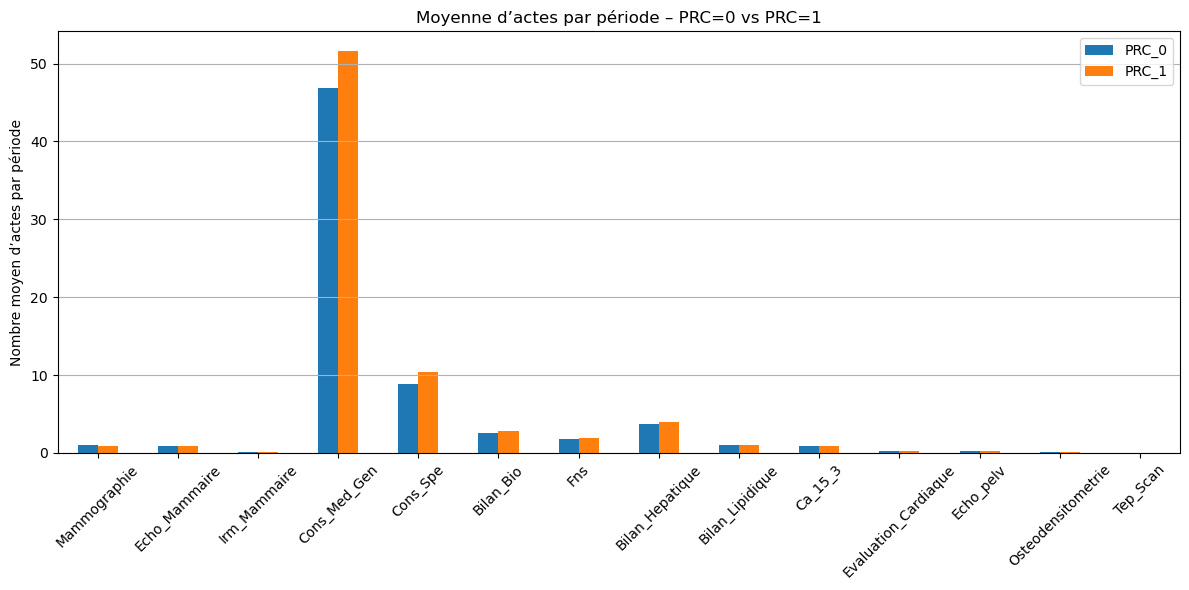

In [38]:
import matplotlib.pyplot as plt

moyennes_par_prc.plot(kind='bar', figsize=(12, 6))
plt.title("Moyenne d’actes par période – PRC=0 vs PRC=1")
plt.ylabel("Nombre moyen d’actes par période")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

 Les patientes du groupe PRC = 1 présentent un suivi  plus intensif, notamment en ce qui concerne les consultations de médecine générale (en moyenne 52 contre 47 actes par période) et les consultations spécialisées. Elles effectuent également plus fréquemment certains bilans biologiques tels que le bilan hépatique ou le dosage du CA 15-3. En revanche, les examens d’imagerie comme la mammographie ou l’IRM mammaire restent globalement équivalents entre les deux groupes

In [ ]:
df_post_T0.to_csv("C:/Users/hp/Downloads/df_post_T0.csv", index=False)
df_suivi_filtré.to_csv("C:/Users/hp/Downloads/df_suivi_filtré.csv", index=False)


In [41]:
df_post_T0.columns

Index(['ID_PATIENT', 'CODE', 'DAYS_SINCE_DIAG', 'TABLE_ORIGIN', 'Cons_Med_Gen',
       'Cons_Spe', 'Mammographie', 'Echo_Mammaire', 'Irm_Mammaire',
       'Echo_Abdominal', 'Thorax', 'Scintigraphie_Osseuse', 'Scanner',
       'Osteodensitometrie', 'Evaluation_Cardiaque', 'Bilan_Bio', 'Fns',
       'Bilan_Hepatique', 'Bilan_Lipidique', 'Ca_15_3', 'Tep_Scan',
       'Echo_pelv', 'Echo_endometre', 'Dosage_calcium', 'Dosage_phosphore',
       'Dosage_pholphocalcique', 'Cons_gyneco', 'RT', 'HT', 'Tamoxifen',
       'Anti_arom', 'GnrH_ago', 'CT', 'Mastectomie', 'Mastectomie_part',
       'SURG', 'T0', 'TREATMENT_TYPE', 'PRC', 'mois_depuis_T0'],
      dtype='object')